In [8]:
import time
%run model_3_functions.ipynb
import keras
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# load the model 
model_3 = keras.models.load_model("model_3.h5")

In [7]:
# plot the coverage area
run_time = 1

# generate the input interval
input_interval_min = np.array([[10., 10.]])
input_interval_max = np.array([[50., 50.]])
input_interval = [input_interval_min, input_interval_max]

print("****************************FIFO list without finding counter example, the run time for split is " + str(run_time) + ".*********************************************************")
start_time = time.time()
res_plot_test = model_3_certification_with_single_input_interval_fifo(input_interval, run_time)
used_time = time.time() - start_time
coverage = model_3_calculate_coverage(res_plot_test)
print("satisfication: " + str(res_plot_test["sat"]))
print("number of safe intervals: " + str(len(res_plot_test["safety_intervals"])))
print("number of unsafe intervals: " + str(len(res_plot_test["counter_intervals"])))
print("number of counter examples: " + str(len(res_plot_test["counter_examples"])))
print("number of uncertain intervals: " + str(len(res_plot_test["uncertain_intervals"])))
print("coverage: " + str(coverage))
print("certification used time: " + str(used_time))

****************************FIFO list without finding counter example, the run time for split is 1.*********************************************************
now searching fifo-todo list.in total 123 intervals in the fifo-todo-list.
satisfication: 0
number of safe intervals: 0
number of unsafe intervals: 15
number of counter examples: 15
number of uncertain intervals: 108
coverage: 0.1328125
certification used time: 14.362181901931763


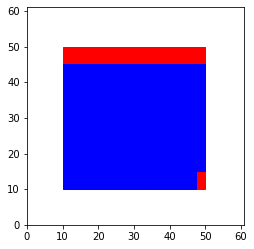

In [24]:
# plot the rectangle, safe in black, unsafe in red, uncertain in silver.
res_plot_test["safety_intervals"]

%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
plt.xlim([0, 61])
plt.ylim([0, 61])
# plot safe intervals as black rectangles
for safe_interval in res_plot_test["safety_intervals"]:
    width = safe_interval[1][0][0] - safe_interval[0][0][0]
    height = safe_interval[1][0][1] - safe_interval[0][0][1]
    ax.add_patch(matplotlib.patches.Rectangle((safe_interval[0][0][0], safe_interval[0][0][1]), width, height, color='black'))
# plot unsafe intervals as red rectangles   
for unsafe_interval in res_plot_test["counter_intervals"]:
    width = unsafe_interval[1][0][0] - unsafe_interval[0][0][0]
    height = unsafe_interval[1][0][1] - unsafe_interval[0][0][1]
    ax.add_patch(matplotlib.patches.Rectangle((unsafe_interval[0][0][0], unsafe_interval[0][0][1]), width, height, color='red'))
# uncertain intervals are white rectangles, that remain in the empty
for uncertain_interval in res_plot_test["uncertain_intervals"]:
    width = uncertain_interval[1][0][0] - uncertain_interval[0][0][0]
    height = uncertain_interval[1][0][1] - uncertain_interval[0][0][1]
    ax.add_patch(matplotlib.patches.Rectangle((uncertain_interval[0][0][0], uncertain_interval[0][0][1]), width, height, color='blue'))